# Clasificación binaria

Predecir la columna Cancer Present en el dataset genes.csv

* 0: No
* 1: Sí


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../../data/genes.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [3]:
df.shape

(3000, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


## EDA

In [5]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

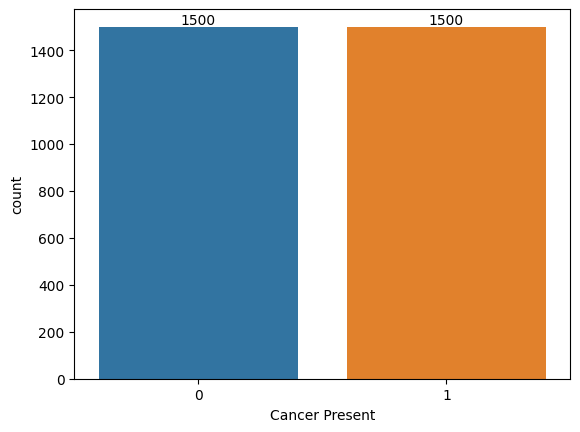

In [6]:
ax = sns.countplot(data=df, x='Cancer Present')
ax.bar_label(ax.containers[0]);

<Axes: xlabel='Cancer Present', ylabel='Gene One'>

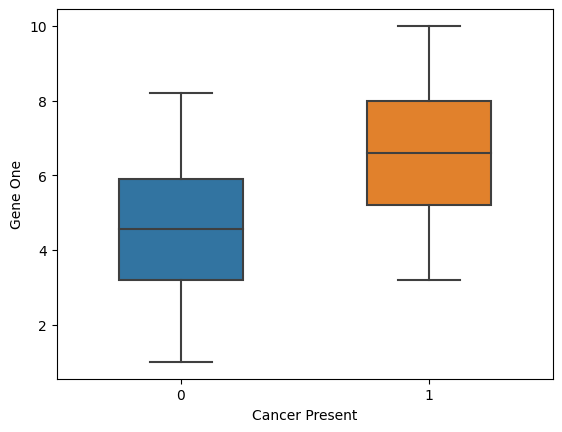

In [7]:
sns.boxplot(data=df, x='Cancer Present', y='Gene One', width=0.5)

<Axes: xlabel='Cancer Present', ylabel='Gene Two'>

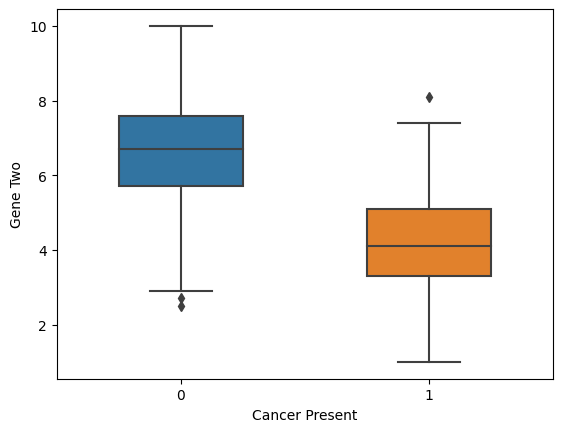

In [8]:
sns.boxplot(data=df, x='Cancer Present', y='Gene Two', width=0.5)

<Axes: xlabel='Gene One', ylabel='Gene Two'>

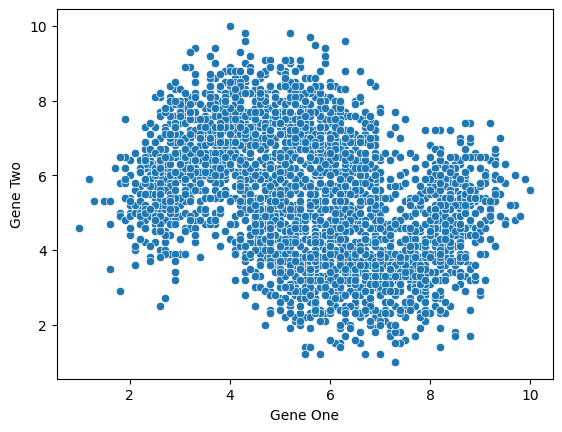

In [9]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two')

<Axes: xlabel='Gene One', ylabel='Gene Two'>

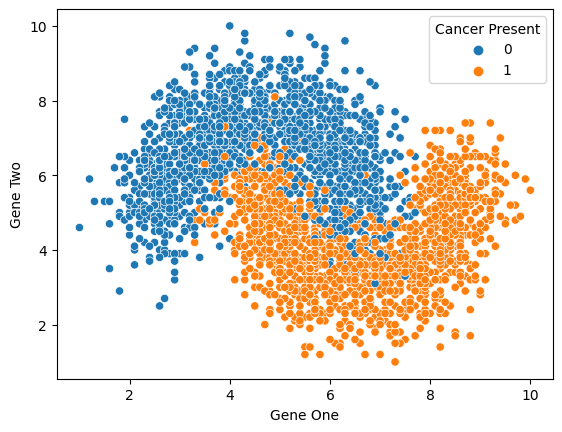

In [10]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present')

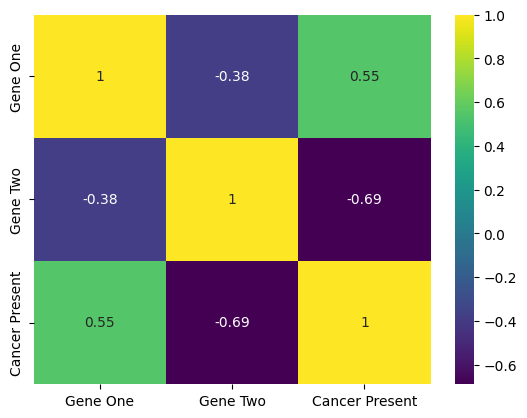

In [11]:
df_corr = df.corr(numeric_only=True).round(2)
sns.heatmap(df_corr, cmap='viridis', annot=True);

In [12]:
X = df[['Gene One', 'Gene Two']]
y = df['Cancer Present']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression

# Similar a la regresión lineal pero aplica una función sigmoide para transformar la salida a 0-1
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred[:10]

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[276  52]
 [ 39 233]]


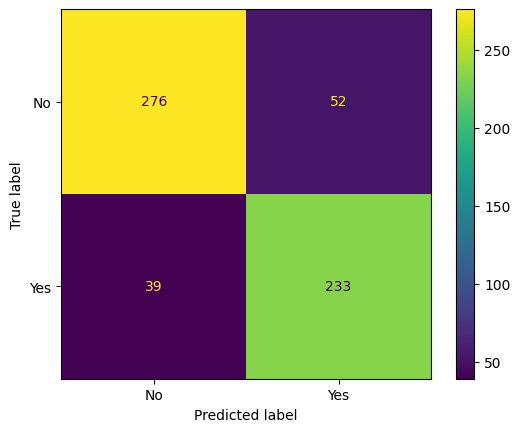

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['No', 'Yes'])
disp = disp.plot()

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.84      0.86       328
           1       0.82      0.86      0.84       272

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600



In [17]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred[:10]

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

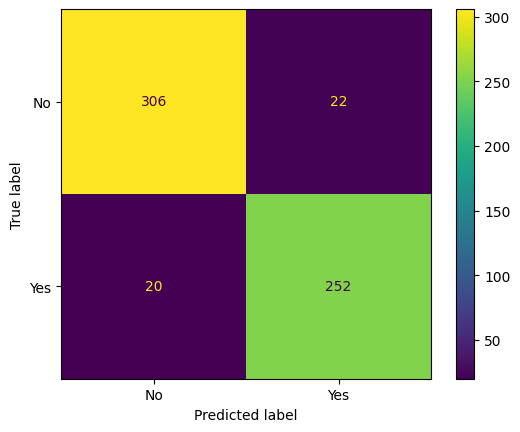

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp = disp.plot()

In [19]:
# la regresión logística asume una relación lineal entre los datos,
# en este caso los datos son no lineales por eso tuvo peores resultados que KNN
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       328
           1       0.92      0.93      0.92       272

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600



## Buscar parámetro n_neighbors

Método del codo

In [45]:
from sklearn.metrics import accuracy_score, f1_score

accuracy_error = []
f1_error = []

# bucle for que itere de 1 a 30 probando los k vecinos de 1 a 30
# KNeighborsClassifier(n_neighbors=i)
# accuracy_score o f1_score
# Guardamos la diferencia de 1 - accuracy en test_errors con append
for k in range(1, 50, 2): # itera los números impares
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    error = 1 - accuracy
    accuracy_error.append(error)

    f1 = f1_score(y_test, y_pred)
    error = 1 - f1
    f1_error.append(error)

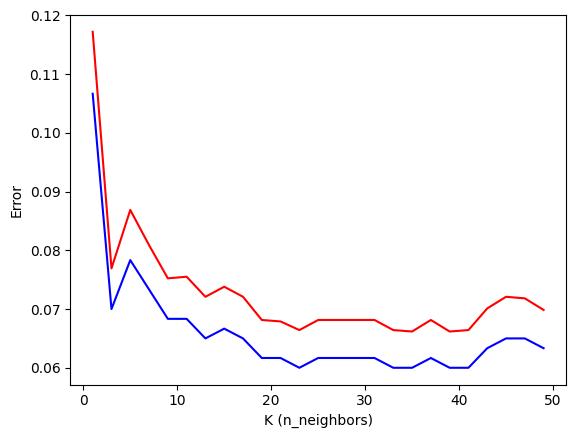

In [48]:
plt.plot(range(1, 50, 2), accuracy_error, c='b')
plt.plot(range(1, 50, 2), f1_error, c='r')

plt.ylabel('Error')
plt.xlabel('K (n_neighbors)');

In [42]:
model = KNeighborsClassifier(n_neighbors=21)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       328
           1       0.93      0.93      0.93       272

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



Algoritmo KNN con python: https://medium.com/@lope.ai/knn-classifier-from-scratch-with-numpy-python-5c436e26a228